# 6.4.1 使用随机森林算法实现

### **<font size=5 face="雅黑"> 1 业务理解</font>**

In [1]:
# 略，详见教材。本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。

**<font size=5 face="雅黑"> 2 数据读入</font>**

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [3]:
plt.rcParams['font.family']=['SimHei']

In [4]:
#数据导入 内置数据集（波士顿房价数据）
df_boston = pd.read_csv('housing.csv'
                        ,header=0
                        ,index_col=0)

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**<font size=5 face="雅黑"> 3 数据理解</font>**

In [5]:
df_boston.shape

(506, 14)

In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df_boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [8]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


**<font size=5 face="雅黑"> 4 数据准备</font>**

In [9]:
#划分训练集与测试集
from sklearn.model_selection import train_test_split

X = df_boston.drop(columns=['MEDV'])
y = df_boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,y
                                                    ,test_size=0.3
                                                    ,random_state=42) 

print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)
print("y_train_shape：", y_train.shape)
print("y_test_shape：", y_test.shape)

X_train_shape: (354, 13)
X_test_shape: (152, 13)
y_train_shape： (354,)
y_test_shape： (152,)


**<font size=5 face="雅黑"> 5 模型训练</font>**

In [10]:
rf = RandomForestRegressor(
    n_estimators=20,
    max_depth=3,
    random_state=42,
    criterion="squared_error",
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

In [11]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=42)

In [12]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.8736721559042631
0.809758733647244


**<font size=5 face="雅黑"> 6 模型评价</font>**

In [13]:
import numpy as np
from sklearn import metrics

y_pred=rf.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('score:', rf.score(X_test,y_test))

Mean Absolute Error (MAE): 2.7944432315790038
Mean Squared Error (MSE): 14.175465660694949
Root Mean Squared Error (RMSE): 3.7650319601160027
Mean Absolute Percentage Error (MAPE): 15.64
score: 0.809758733647244


**<font size=5 face="雅黑"> 7 模型调参</font>**

In [14]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(
 |      n_estimators=100,
 |      *,
 |      criterion='squared_error',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=1.0,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      bootstrap=True,
 |      oob_score=False,
 |      n_jobs=None,
 |      random_state=None,
 |      verbose=0,
 |      warm_start=False,
 |      ccp_alpha=0.0,
 |      max_samples=None,
 |      monotonic_cst=None
 |  )
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"

In [15]:
#导入随机森林模块
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid={
    'bootstrap': [True],
    'n_estimators':[5,10,20,50,100,150,200], 
    'max_depth':[3,5,7], 
    'max_features':[0.6,0.7,0.8,1], 
    'min_samples_leaf':[1,2],
    'min_samples_split':[2,3,4]
    
}
#实例化随机森林回归器
rf=RandomForestRegressor(random_state=42)
#以随机森林回归器为基础构造网络搜索回归器
grid=GridSearchCV(rf,param_grid=param_grid,cv=3)

grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8, 1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 20, 50, 100, 150, 200]})

In [16]:
#查看效果最好的模型
grid.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [17]:
#制定效果最好参数对应的模型
rf_reg=RandomForestRegressor(bootstrap=True,
                             n_estimators=50,
                             max_depth=7,
                             max_features=0.6,
                             min_samples_leaf=1, 
                             min_samples_split=3,
                             random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features=0.6, min_samples_split=3,
                      n_estimators=50, random_state=42)

In [18]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(
 |      n_estimators=100,
 |      *,
 |      criterion='squared_error',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=1.0,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      bootstrap=True,
 |      oob_score=False,
 |      n_jobs=None,
 |      random_state=None,
 |      verbose=0,
 |      warm_start=False,
 |      ccp_alpha=0.0,
 |      max_samples=None,
 |      monotonic_cst=None
 |  )
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"

In [19]:
import numpy as np
from sklearn import metrics

y_pred=rf_reg.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))

print('score:', rf_reg.score(X_test,y_test))

Mean Absolute Error (MAE): 2.104786591392807
Mean Squared Error (MSE): 10.164999602920512
Root Mean Squared Error (RMSE): 3.188259651113835
Mean Absolute Percentage Error (MAPE): 10.89
score: 0.8635810319588433


In [20]:
#特征重要度分析
rf_reg.feature_importances_

array([0.04660214, 0.0027302 , 0.02264696, 0.0019453 , 0.02841496,
       0.34504749, 0.01866779, 0.06096373, 0.00620565, 0.0173559 ,
       0.04882351, 0.01272253, 0.38787385])

In [21]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
print('特征排序：')
feature_names=X.columns
feature_importances=rf_reg.feature_importances_
indices=np.argsort(feature_importances)
print(indices)
for index in indices:
    print('feature %s (%f)' %(feature_names[index],feature_importances[index]))

特征排序：
[ 3  1  8 11  9  6  2  4  0 10  7  5 12]
feature CHAS (0.001945)
feature ZN (0.002730)
feature RAD (0.006206)
feature B (0.012723)
feature TAX (0.017356)
feature AGE (0.018668)
feature INDUS (0.022647)
feature NOX (0.028415)
feature CRIM (0.046602)
feature PTRATIO (0.048824)
feature DIS (0.060964)
feature RM (0.345047)
feature LSTAT (0.387874)


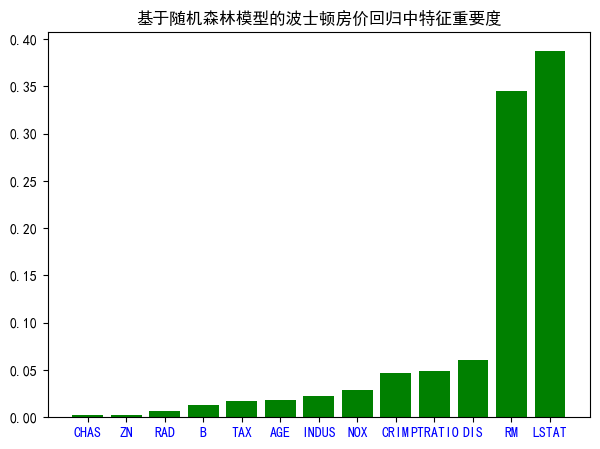

In [23]:
plt.figure(figsize=(7,5))
plt.title('基于随机森林模型的波士顿房价回归中特征重要度')

plt.bar(range(len(feature_importances)),feature_importances[indices],color='green')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='blue')
plt.show()

**<font size=5 face="雅黑"> 8 模型预测</font>**

In [24]:
#查看预测结果
prediction = pd.DataFrame(rf_reg.predict(X_test),columns=['prediction'])
MEDV = pd.DataFrame(y_test, columns=['MEDV']).reset_index()
result = pd.concat([prediction,MEDV],axis=1).drop('index',axis=1)
result
#result.head(10)

,prediction,MEDV
0,22.942576,23.6
1,30.830495,32.4
2,15.888084,13.6
3,23.513822,22.8
4,17.332214,16.1
...,...,...
147,13.665889,17.1
148,14.903981,14.5
149,41.650430,50.0
150,16.162551,14.3


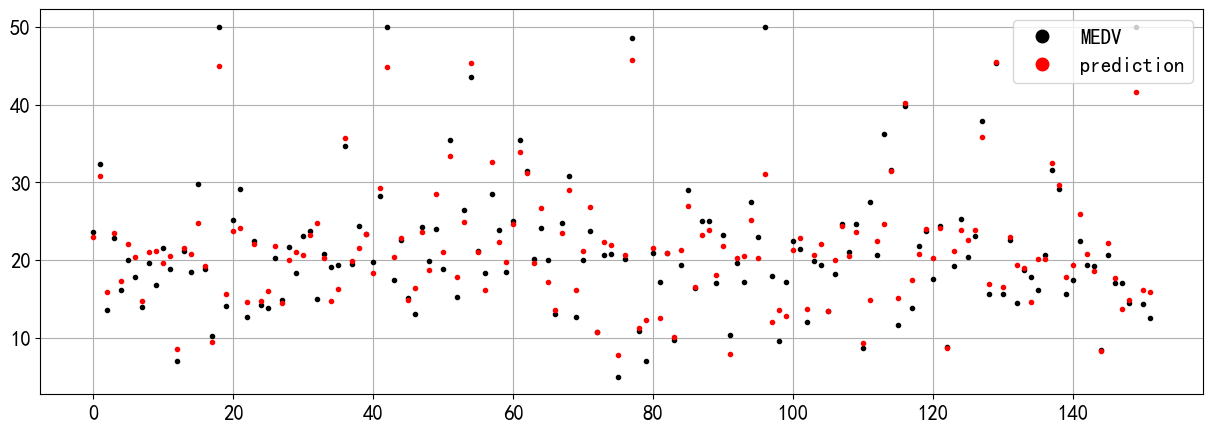

In [25]:
result['MEDV'].plot(style='k.',figsize=(15,5))
result['prediction'].plot(style='r.')
plt.legend(fontsize=15,markerscale=3)#设置图例字号以及图例大小
plt.tick_params(labelsize=15)#设置坐标数字大小
plt.grid()